In [133]:
import pandas as pd
import json
from pandas.io.json import json_normalize

,clients,ts,latency,files,dirs
0,1,13:13:27,0:00:00.135461,5,3
1,2,13:14:42,0:00:00.142848,11,5
2,3,13:15:52,0:00:00.164195,20,7
3,4,13:16:52,0:00:00.141850,32,10
4,5,13:18:04,0:00:00.149736,47,13
5,6,13:19:11,0:00:00.139868,65,15


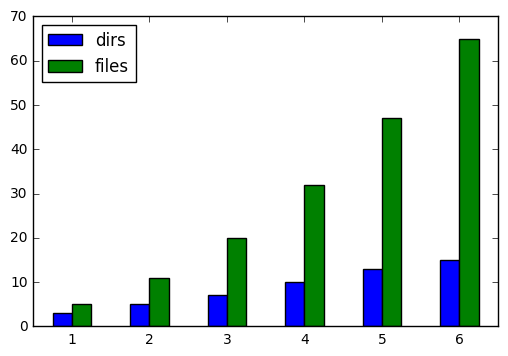

In [134]:
df = pd.read_csv("results/files.txt", names=['clients', 'ts', 'latency', 'files'])
df0 = pd.read_csv("results/dirs.txt", names=['clients', 'ts', 'latency', 'dirs'])

df['dirs'] = df0['dirs']
ax = df[['dirs', 'files']].plot.bar()
ax.set_xticklabels(df['clients'], rotation=0)
df

In [210]:
val = pd.DataFrame()
with open ("results/perfdump_" + str(1) + "_after") as f:
    data = json.load(f)
    val = json_normalize(data['mds_server'])
df0 = pd.DataFrame(columns=list(val))
print list(val)

for i in [1, 2, 3, 4, 5, 6]:
    with open ("results/perfdump_" + str(i) + "_after") as f:
        data = json.load(f)
        val = json_normalize(data['mds_server'])
    with open ("results/perfdump_" + str(i) + "_before") as f:
        data = json.load(f)
        val = val - json_normalize(data['mds_server'])
    df0 = df0.append(val)
df0 = df0.set_index([[0, 1, 2, 3, 4, 5]])
df0['clients'] = [1, 2, 3, 4, 5, 6]

print df0['handle_client_request']
df_plot = df0
del df_plot['dispatch_client_request']
del df_plot['dispatch_server_request']
del df_plot['handle_client_request']
del df_plot['handle_client_session']
del df_plot['handle_slave_request']
del df_plot['req_setdirlayout']
del df_plot['req_setfilelock']
del df_plot['req_setlayout']

#ax = df_plot.plot.bar()
#ax.set_xticklabels(df['clients'], rotation=0)

#print df0['req_lookup']/df0['req_create']
print df_plot.sum(axis=1)
df_plot




[u'dispatch_client_request', u'dispatch_server_request', u'handle_client_request', u'handle_client_session', u'handle_slave_request', u'req_create', u'req_getattr', u'req_getfilelock', u'req_link', u'req_lookup', u'req_lookupino', u'req_lookupname', u'req_lookupparent', u'req_lookupsnap', u'req_lssnap', u'req_mkdir', u'req_mknod', u'req_mksnap', u'req_open', u'req_readdir', u'req_rename', u'req_renamesnap', u'req_rmdir', u'req_rmsnap', u'req_rmxattr', u'req_setattr', u'req_setdirlayout', u'req_setfilelock', u'req_setlayout', u'req_setxattr', u'req_symlink', u'req_unlink']
0     19.0
1     55.0
2     91.0
3    131.0
4    208.0
5    247.0
Name: handle_client_request, dtype: float64
0     29.0
1     81.0
2    136.0
3    185.0
4    274.0
5    322.0
dtype: float64


,req_create,req_getattr,req_getfilelock,req_link,req_lookup,req_lookupino,req_lookupname,req_lookupparent,req_lookupsnap,req_lssnap,...,req_rename,req_renamesnap,req_rmdir,req_rmsnap,req_rmxattr,req_setattr,req_setxattr,req_symlink,req_unlink,clients
0,9.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,12.0,3.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2
2,17.0,16.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,3
3,23.0,9.0,0.0,0.0,85.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4
4,30.0,21.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,5
5,35.0,15.0,0.0,0.0,122.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,6
